In [3]:
import numpy as np
import random
from sklearn.datasets.samples_generator import make_classification
import pylab
from scipy import stats

In [4]:
# генерируем случайные данные для задачи классификации
x, y = make_classification (n_samples=100, n_features=8, n_informative=5)
x=np.abs(x)


In [5]:
x_t = x.transpose()

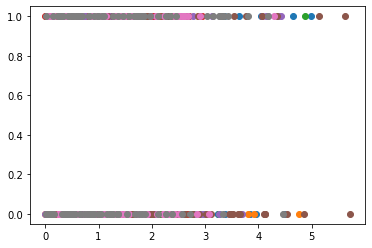

In [6]:
pylab.plot(x, y, 'o')
pylab.show()

In [8]:
# размер данных

m, n = np.shape(x)
m, n

(100, 8)

In [9]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[1.00000000e+00, 4.66562402e-01, 1.10409575e-04, 1.37800675e+00,
        3.24705487e-01, 1.15736237e+00, 2.34744870e+00, 2.21387151e+00,
        3.66367352e-01],
       [1.00000000e+00, 3.64215201e+00, 2.32799885e+00, 4.86888049e+00,
        1.51327065e-01, 1.86800337e+00, 4.35028415e+00, 4.28481233e+00,
        1.85642378e+00],
       [1.00000000e+00, 1.80280697e+00, 7.32948119e-01, 5.50513465e-01,
        2.49680012e+00, 1.45713021e+00, 1.55207557e+00, 4.90726100e-01,
        8.28390721e-01],
       [1.00000000e+00, 1.93618608e-01, 1.38375989e+00, 1.32038527e+00,
        7.63838308e-01, 1.83086340e+00, 4.61425857e-01, 6.39343820e-01,
        5.04367525e-01],
       [1.00000000e+00, 1.95381341e+00, 9.65008298e-01, 1.66073050e-01,
        1.02107138e-01, 1.23753236e+00, 2.27153444e+00, 5.30548235e-01,
        1.45601478e+00]])

In [10]:
# y лист значений
y[:5]

array([0, 1, 1, 0, 1])

In [11]:
# шаг алгоритма
alpha = 0.01

In [12]:
def gradient_descent_3(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(9) # [ 1.  1.]
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta)
        # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    
    return theta

In [13]:
%%time
theta = gradient_descent_3(alpha, x, y, 1000)

iter 0 | J: 71.923
iter 1 | J: 48.004
iter 2 | J: 32.065
iter 3 | J: 21.444
iter 4 | J: 14.366
iter 5 | J: 9.649
iter 6 | J: 6.505
iter 7 | J: 4.409
iter 8 | J: 3.012
iter 9 | J: 2.080
iter 10 | J: 1.458
iter 11 | J: 1.042
iter 12 | J: 0.765
iter 13 | J: 0.579
iter 14 | J: 0.454
iter 15 | J: 0.371
iter 16 | J: 0.314
iter 17 | J: 0.276
iter 18 | J: 0.249
iter 19 | J: 0.231
iter 20 | J: 0.218
iter 21 | J: 0.209
iter 22 | J: 0.202
iter 23 | J: 0.197
iter 24 | J: 0.193
iter 25 | J: 0.190
iter 26 | J: 0.187
iter 27 | J: 0.185
iter 28 | J: 0.182
iter 29 | J: 0.180
iter 30 | J: 0.179
iter 31 | J: 0.177
iter 32 | J: 0.175
iter 33 | J: 0.174
iter 34 | J: 0.172
iter 35 | J: 0.171
iter 36 | J: 0.169
iter 37 | J: 0.168
iter 38 | J: 0.167
iter 39 | J: 0.165
iter 40 | J: 0.164
iter 41 | J: 0.163
iter 42 | J: 0.162
iter 43 | J: 0.160
iter 44 | J: 0.159
iter 45 | J: 0.158
iter 46 | J: 0.157
iter 47 | J: 0.156
iter 48 | J: 0.155
iter 49 | J: 0.154
iter 50 | J: 0.153
iter 51 | J: 0.152
iter 52 | J: 0.15

In [52]:
theta

array([ 0.45236415, -0.01981323,  0.0359397 ,  0.00549428,  0.01117261,
       -0.06635298, -0.13973532,  0.12643723,  0.00092149])

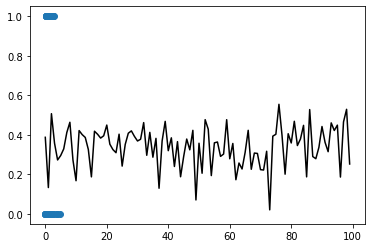

In [14]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x_t[0] + theta[2]*x_t[1] + theta[3]*x_t[2] + theta[4]*x_t[3] + theta[5]*x_t[4] 
    + theta[6]*x_t[5] +  + theta[8]*x_t[7] + theta[7]*x_t[6]
    
# рисуем результат
pylab.plot(x[:,2],y,'o')
pylab.plot (y_predict,'k-')
pylab.show()


In [17]:
#Градиентный бустинг для логистической регрессии

def gradient_descent_4(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] 
    theta = np.ones(9) 
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        step1 = np.dot(x, theta)
        hypothesis = 1/ (1 + np.exp(-step1)) # матричное произведение
        
        
        h_t = hypothesis.transpose()
        
        loss = hypothesis - y
        logloss = ((y-1)* np.log((1-hypothesis))) - (y * np.log((hypothesis)))
                                                   
        J = np.sum(logloss)/m  # функция потерь    
        
        print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m 
        theta = theta - alpha * gradient  # update
    
    return theta

In [18]:
theta = gradient_descent_4(alpha, x, y, 1000)

iter 0 | J: 5.898
iter 1 | J: 5.856
iter 2 | J: 5.813
iter 3 | J: 5.771
iter 4 | J: 5.729
iter 5 | J: 5.687
iter 6 | J: 5.645
iter 7 | J: 5.603
iter 8 | J: 5.561
iter 9 | J: 5.519
iter 10 | J: 5.476
iter 11 | J: 5.434
iter 12 | J: 5.392
iter 13 | J: 5.350
iter 14 | J: 5.308
iter 15 | J: 5.266
iter 16 | J: 5.224
iter 17 | J: 5.182
iter 18 | J: 5.139
iter 19 | J: 5.097
iter 20 | J: 5.055
iter 21 | J: 5.013
iter 22 | J: 4.971
iter 23 | J: 4.929
iter 24 | J: 4.887
iter 25 | J: 4.845
iter 26 | J: 4.803
iter 27 | J: 4.761
iter 28 | J: 4.719
iter 29 | J: 4.676
iter 30 | J: 4.634
iter 31 | J: 4.592
iter 32 | J: 4.550
iter 33 | J: 4.508
iter 34 | J: 4.466
iter 35 | J: 4.424
iter 36 | J: 4.382
iter 37 | J: 4.340
iter 38 | J: 4.298
iter 39 | J: 4.256
iter 40 | J: 4.214
iter 41 | J: 4.172
iter 42 | J: 4.130
iter 43 | J: 4.088
iter 44 | J: 4.046
iter 45 | J: 4.004
iter 46 | J: 3.962
iter 47 | J: 3.920
iter 48 | J: 3.879
iter 49 | J: 3.837
iter 50 | J: 3.795
iter 51 | J: 3.753
iter 52 | J: 3.711
ite

# Проверка на готовых алгоритмах sklearn

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [20]:
model = linear_model.SGDClassifier( alpha = 0.01, max_iter = 1000 )

In [21]:
model.fit( x, y )

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
model.coef_

array([[-0.32666442, -0.3771273 , -0.74209514, -0.08834438,  0.25898112,
         0.00157487, -0.83208223,  0.64861513,  0.98735554]])

In [23]:
model1 = LogisticRegression()

In [24]:
model1.fit( x, y )

C:\Users\seminaae\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model1.coef_

array([[-0.31118187, -0.1220175 , -0.33294758, -0.07164537,  0.34679452,
         0.20340237, -0.41855854,  0.44127659,  0.72217573]])